In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
user_data={
    "MarksA":np.random.randint(1,100,10),
    "marksb":np.random.randint(1,100,10),
    "marksc":np.random.randint(1,100,10)
}

In [16]:
user_data

{'MarksA': array([88, 33, 94, 99, 94, 59, 80, 69, 91, 80]),
 'marksb': array([38, 40,  1, 69, 47, 65, 50, 51, 64, 64]),
 'marksc': array([14, 97,  8, 89, 46, 20, 93, 30, 33, 65])}

In [17]:
df = pd.DataFrame(user_data,dtype = 'float32')

In [18]:
df

,MarksA,marksb,marksc
0,88.0,38.0,14.0
1,33.0,40.0,97.0
2,94.0,1.0,8.0
3,99.0,69.0,89.0
4,94.0,47.0,46.0
5,59.0,65.0,20.0
6,80.0,50.0,93.0
7,69.0,51.0,30.0
8,91.0,64.0,33.0
9,80.0,64.0,65.0


In [19]:
df.columns

Index(['MarksA', 'marksb', 'marksc'], dtype='object')

In [20]:
df.to_csv('marks.csv',index = False)

In [21]:
my_data = pd.read_csv('marks.csv')

In [22]:
my_data.describe() ## Show the statistics of the dataframe


,MarksA,marksb,marksc
count,10.000000,10.000000,10.000000
mean,78.700000,48.900000,49.500000
std,20.254218,20.057972,34.101971
min,33.000000,1.000000,8.000000
25%,71.750000,41.750000,22.500000
50%,84.000000,50.500000,39.500000
75%,93.250000,64.000000,83.000000
max,99.000000,69.000000,97.000000


In [23]:
my_data

,MarksA,marksb,marksc
0,88.0,38.0,14.0
1,33.0,40.0,97.0
2,94.0,1.0,8.0
3,99.0,69.0,89.0
4,94.0,47.0,46.0
5,59.0,65.0,20.0
6,80.0,50.0,93.0
7,69.0,51.0,30.0
8,91.0,64.0,33.0
9,80.0,64.0,65.0


In [24]:
my_data.iloc[1] #selects the row according to the index


MarksA    33.0
marksb    40.0
marksc    97.0
Name: 1, dtype: float64

In [25]:
my_data.iloc[7,2]

30.0

In [26]:
idx = [my_data.columns.get_loc('marksc'),my_data.columns.get_loc('marksb')]

In [27]:
idx

[2, 1]

In [28]:
df.iloc[:3,idx]

,marksc,marksb
0,14.0,38.0
1,97.0,40.0
2,8.0,1.0


In [29]:
my_data.sort_values(by=['marksc',"MarksA"],ascending=False)

,MarksA,marksb,marksc
1,33.0,40.0,97.0
6,80.0,50.0,93.0
3,99.0,69.0,89.0
9,80.0,64.0,65.0
4,94.0,47.0,46.0
8,91.0,64.0,33.0
7,69.0,51.0,30.0
5,59.0,65.0,20.0
0,88.0,38.0,14.0
2,94.0,1.0,8.0


In [30]:
data_array = my_data.values # Changes pandas dataframe to numpy array

In [31]:
print(type(data_array))

<class 'numpy.ndarray'>


In [32]:
new = pd.DataFrame(data_array,columns=["IOT","DS","ML"]) #rename the columns

In [33]:
new

,IOT,DS,ML
0,88.0,38.0,14.0
1,33.0,40.0,97.0
2,94.0,1.0,8.0
3,99.0,69.0,89.0
4,94.0,47.0,46.0
5,59.0,65.0,20.0
6,80.0,50.0,93.0
7,69.0,51.0,30.0
8,91.0,64.0,33.0
9,80.0,64.0,65.0


In [34]:
new.to_csv("new_marks.csv", index = False)

In [35]:
pcm = pd.read_csv('new_marks.csv')

In [36]:
pcm

,IOT,DS,ML
0,88.0,38.0,14.0
1,33.0,40.0,97.0
2,94.0,1.0,8.0
3,99.0,69.0,89.0
4,94.0,47.0,46.0
5,59.0,65.0,20.0
6,80.0,50.0,93.0
7,69.0,51.0,30.0
8,91.0,64.0,33.0
9,80.0,64.0,65.0


## Loading and Visualising MNIST dataset using Pandas and Matplotlib

In [37]:
df = pd.read_csv('mnist_train.csv')

In [38]:
df.shape

(42000, 785)

In [39]:
data = df.values
np.random.shuffle(data)

In [40]:
x = data[:,1:] # Each row in x denotes 1 image
y = data[:,0] # Each row in y denotes the label for 1 image
print(x.shape,y.shape)

(42000, 784) (42000,)


In [41]:
# Try To visualize 1 image

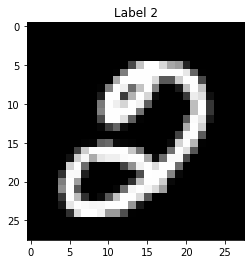

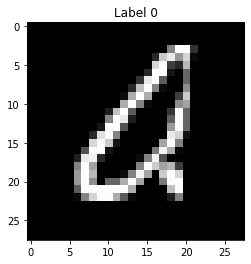

In [42]:
def DrawImage(x,y,i):
    plt.imshow(x[i].reshape(28,28),cmap="gray") # Reshape because x in a falt array of 784 pixels
    plt.title(f"Label {y[i]}")
    plt.show()
    
for i in range(2):
    DrawImage(x,y,i)

## We always have to split our dataset into two parts, one for training and one for testing and validation

In [43]:
#Split Dataset
# Lets say we want 80 percent of our data set for the testing
split = int(0.80*x.shape[0])
print(split)

33600


In [44]:
x_train , y_train = x[:split,:], y[:split]
x_test , y_test = x[split:,:], y[split:]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


## Sometimes the data is not randomized,for this training data will be different and testing data will be different so we have to randomiz the data

In [45]:
a = np.array([1,2,3,4])
np.random.shuffle(a)
print(a)

[1 4 2 3]


In [46]:
# TO shuffle a 2D array
b = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])
np.random.shuffle(b)
print(b)

[[7 8 9]
 [1 2 3]
 [4 5 6]]


/var/folders/nq/3__f3f315gx2l7j9x0zyk6th0000gn/T/ipykernel_10008/1521617993.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


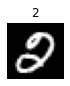

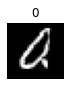

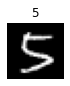

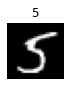

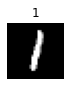

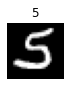

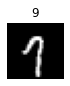

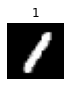

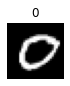

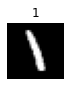

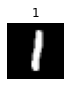

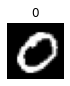

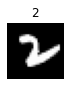

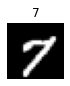

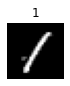

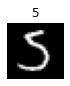

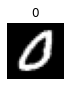

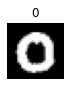

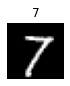

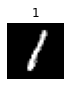

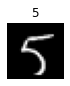

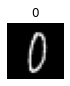

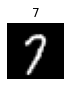

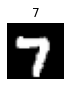

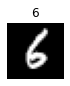

In [52]:
# Trying to plot the visualixation (First 25 image in a 5*5 grid)
from importlib import reload #you may have somewhere in the code used plt.xlabel = "Some Label" this will actually change the import of matplotlib.pyplot.
plt=reload(plt) #All we have to do here is simply reload the libraries by typing the following lines of code to fix the error without closing/restarting the notebook:
for i in range(25):
    plt.figure(figsize=(6,6))
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i].reshape(28,28),cmap = 'gray')
    plt.title(y_train[i])
    plt.axis('off')

## We can also use the sklearn library to do the train test split for us 

In [48]:
from sklearn.model_selection import train_test_split

In [54]:
x_Train,x_Test,y_Train,y_Test = train_test_split(x,y,train_size=0.8,random_state=5) #What percent you want to allot for training and testing)
print(x_Train.shape,y_Train.shape)
print(x_Test.shape,y_Test.shape)


(33600, 784) (33600,)
(8400, 784) (8400,)
